In [1]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split

In [2]:
X, y= make_blobs(random_state=0)
print(X.shape , y.shape)
print(np.unique(y, return_counts=True))

(100, 2) (100,)
(array([0, 1, 2]), array([34, 33, 33], dtype=int64))


In [3]:
# lr = LogisticRegression()
lr = LogisticRegression(C=100)

# lr.fit(X, y) # 전체 데이터로 훈련하면X -> 테스트 불가능
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)    # test_size:검증용 데이터 개수 조정
# print(X_train.shape, y_train.shape)

lr.fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.92, 0.88)

In [4]:
# 교차검증
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score     #함수의 매개변수 평가

In [5]:
iris = load_iris()
lr = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr,iris['data'],iris['target'], cv=5)
print(scores)
print(np.mean(scores))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


In [6]:
from sklearn.model_selection import KFold

In [7]:
kfold = KFold(n_splits=3)
cross_val_score(lr, iris.data, iris.target, cv=kfold)        #array([0., 0., 0.])  -> 문제발생 ->각 세트에 비율을 비슷하게 만들어 줘야함.

array([0., 0., 0.])

In [8]:
# 데이터가 편항되어 있을 경우(몰려있을 경우) 단순 k-겹 교차검증을 사용하면 성능 평가가 잘 되지 않을 수 있다.
# 그럴 땐 stratified k-fold cross-validation을 사용

In [9]:
from sklearn.model_selection import StratifiedKFold

In [10]:
kfold = StratifiedKFold(n_splits=3)
cross_val_score(lr, iris.data, iris.target, cv=kfold) 

array([0.98, 0.96, 0.98])

In [11]:
kfold = KFold(n_splits=3, shuffle=True)      # shuffle=True => 데이터를 무작위로 해서 뽑는다.(데이터 많을때 이용)
cross_val_score(lr, iris.data, iris.target, cv=kfold)

array([0.92, 0.98, 0.98])

In [12]:
cross_val_score(lr, iris.data, iris.target, cv=3)  #default = stratified

array([0.98, 0.96, 0.98])

In [1]:
from sklearn.model_selection import  train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC 

In [2]:
# 간단한 그리드 서치구현
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다 
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train) 
        score = svm.score(X_test, y_test) # 테스트 세트로 평가
    
        if score > best_score: # 점수가 더 높으면 매개변수와 함께 기록 
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: {}".format(best_parameters))


최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


In [5]:
# 데이터를 훈련 + 테스트 세트로 분할 
X_trainval, X_test, y_trainval, y_test = \
    train_test_split( iris.data, iris.target, random_state=0)

# 훈련세트를 훈련 세트와 검증 세트로 분할 
X_train, X_valid, y_train, y_valid = \
    train_test_split( X_trainval, y_trainval, random_state=1)

print("훈련: {}  검증: {}  테스트:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

훈련: 84  검증: 28  테스트: 38



In [9]:
# 매개변수 과대적합 검증 세트 구현

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
#         print('params:',(C, gamma))
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다 
        svm = SVC(gamma=gamma, C=C) 
        svm.fit(X_train, y_train)

        score = svm.score(X_valid, y_valid) # 검증 세트로 SVC를 평가합니다
        
    if score > best_score: # 점수가 더 높으면 매개변수와 함께 기록합니다 
        best_score = score 
        best_parameters = {'C': C, 'gamma': gamma}
        
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가 
#best_parameters={'C': C, 'gamma': gamma, 'kernel':kernel} 일 경우 **best_parameters = SVC(C=C, gamma=gamma, kernel=kernel)값이 들어간다.
# * = 리스트, ** = 딕셔너리 풀어준다
svm = SVC(**best_parameters)   # **best_parameters : SVC(C=C, gamma=gamma) -> SVC(C=10, gamma=0.001)
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("검증 세트에서 최고 점수: {:.2f}".format(best_score)) 
print("최적 파라미터: ", best_parameters) 
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 100, 'gamma': 0.01}
최적 파라미터에서 테스트 세트 점수: 0.97


# 교차검증 그리드 서치 (cross_val_score) p324~

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다 
        svm = SVC(gamma=gamma, C=C) 
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
#         print(scores)
        score=np.mean(scores)

    if score > best_score: # 점수가 더 높으면 매개변수와 함께 기록합니다 
        best_score = score 
        best_parameters = {'C': C, 'gamma': gamma}
        
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가 

svm = SVC(**best_parameters)   # **best_parameters : SVC(C=C, gamma=gamma) -> SVC(C=10, gamma=0.001)
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("검증 세트에서 최고 점수: {:.2f}".format(best_score)) 
print("최적 파라미터: ", best_parameters) 
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 100, 'gamma': 0.01}
최적 파라미터에서 테스트 세트 점수: 0.97


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
#  반복문 돌려 최적값 찾기
gsc = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

gsc.fit(X_trainval, y_trainval)   #(6개 * 6개 * 5번 반복)

print(gsc.best_score_)
print(gsc.best_params_)
print(gsc.score(X_test, y_test))

0.9731225296442687
{'C': 10, 'gamma': 0.1}
0.9736842105263158


In [17]:
import pandas as pd

results = pd.DataFrame(gsc.cv_results_)
# results.head()
results.iloc[:, 4:].head()

,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


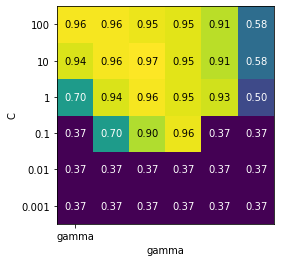

In [21]:
import mglearn

# results['mean_test_score'] # 36개 값, 
scores = results['mean_test_score'].values.reshape(6,6)
# print(scores)

mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', 
                      yticklabels=param_grid['C'],
                      xticklabels=['gamma'])


In [22]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {'kernel': ['linear'], 
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=5, 
                           return_train_score=True) 
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.99


In [27]:
# grid_search.cv_results_
pd.DataFrame(grid_search.cv_results_).iloc[:, 4:].T.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,...,0.941176,0.941176,0.882353,0.588235,0.352941,0.941176,0.882353,1,1,0.941176


In [28]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

gsc = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

scores = cross_val_score(gsc, iris.data, iris.target, cv=5)

print(scores, scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ] 0.9800000000000001
